Movie Year JSON data has been stored in Redis.
Here's the DataFrame!:


,title,year,imdb_id
0,Toy Story 2,1999,tt0120363
1,Tarzan,1999,tt0120855
2,The Matrix,1999,tt0133093
3,Fight Club,1999,tt0137523
4,The Green Mile,1999,tt0120689
5,The Mummy,1999,tt0120616
6,American Pie,1999,tt0163651
7,Eyes Wide Shut,1999,tt0120663
8,Star Wars: Episode I - The Phantom Menace,1999,tt0120915
9,A Christmas Carol,1999,tt0216621


Movies by Title JSON data has been stored in Redis.
Here's the DataFrame!:


,title,year,imdb_id
35,STAR TREK: PICARD - THE IMAX® LIVE SERIES FINALE EVENT,2023,tt8806524
34,Star Trek: Picard - The IMAX Live Series Finale Event,2023,tt27034337
24,Star Trek: First Frontier,2020,tt9753990
47,What We Left Behind: Looking Back at Star Trek: Deep Space Nine,2018,tt6332276
8,Star Trek Beyond: Visually Effective,2016,tt6339216
27,Star Trek: Inside the Roddenberry Vault,2016,tt6285552
26,Star Trek: Horizon,2016,tt3854562
1,Building Star Trek,2016,tt6071476
0,50 Years of Star Trek,2016,tt5941796
7,Star Trek Beyond,2016,tt2660888


Displaying Histogram


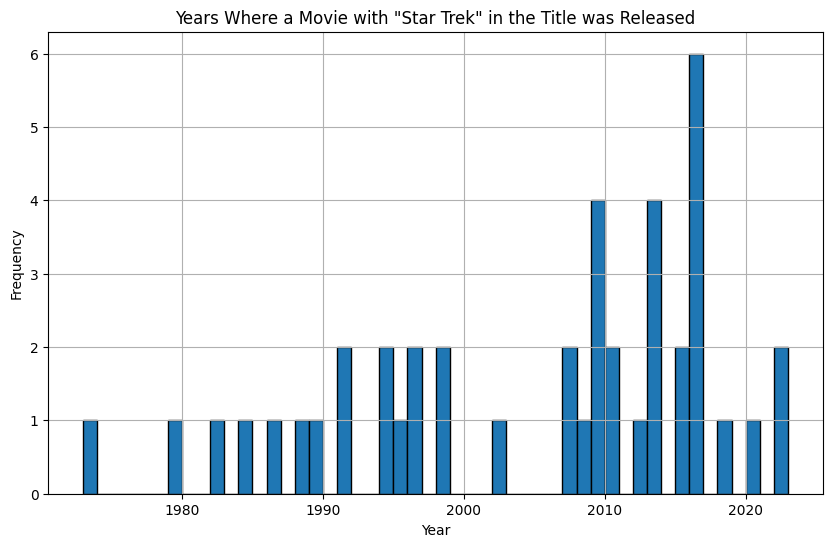

In [6]:
## FINAL

# API FROM <https://rapidapi.com/amrelrafie/api/movies-tv-shows-database>
# Notes from <https://gchandra.gitbook.io/big-data-and-tools-with-nosql/nosql/redis/redis-cache-demo> used to connect to Redis
# Video from <https://www.youtube.com/watch?v=p71SWzjeqtk&ab_channel=DevOpsJourney> used to connect to API and grab JSON data
# API has page with Endpoints and code template for Python Requests <https://rapidapi.com/amrelrafie/api/movies-tv-shows-database> 
# Information from <https://www.geeksforgeeks.org/pandas-parsing-json-dataset> used to parse JSON Datasets
# Notes from <https://gchandra.gitbook.io/big-data-and-tools-with-nosql/python/python-classes> used to integrate Python Classes

# History of work can be found here: /Users/jonathanbressler/Documents/Rowan Data Cert./CS02516 - Big Data Tools/HW3/Big-Data-Tools-homeworks/Practice and Testing

# CREATING A CLASS TO ACCESS API
import requests
from requests import Session
import api_key
import json
import redis
import pandas as pd
import matplotlib.pyplot as plt


# CONNECT TO REDIS
r = redis.Redis(
    host='redis-18411.c251.east-us-mz.azure.cloud.redislabs.com',
    port=18411,
    db=0,
    username='default',
    password='IBBTuSHdeF8380fyO8qavNOOVARtarXe',
    ssl=False  # Enable SSL if your Redis server requires it
)
            
# CLASSES FOR ACCESSING API INFO
class CMC:
    def __init__(self,token):
        self.apiurl = 'https://movies-tv-shows-database.p.rapidapi.com/'
        self.headers = {'Accepts': 'applications/json', 'X-CMC_PRO_API_KEY': token,}
        self.apiHost = 'movies-tv-shows-database.p.rapidapi.com'
        self.session = Session()
        self.session.headers.update(self.headers)

    def movieByTitle(self, movieTitle):
        url = self.apiurl #"https://movies-tv-shows-database.p.rapidapi.com/"
        headers = {
            "Type": "get-movies-by-title",
            "X-RapidAPI-Key": api_key.API_KEY, #"25bc92d2c8msh7d2e87cd575cceap1a336ajsnaca79d76c2c2",
            "X-RapidAPI-Host": self.apiHost #"movies-tv-shows-database.p.rapidapi.com"
        }
        
        # TELLS API WHAT WE WANT
        querystring = {"title":movieTitle}

        # LOADS FILE AND INDENTS IT FOR EASIER READING
        # sends a GET request to the API endpoint and returns a response object
        response = requests.get(url, headers=headers, params=querystring)
        
        # CHECK IF THE REQUEST WAS SUCCESSFUL
        if response.status_code == 200:
            
            # PARSE JSON RESPONSE INTO A PYTHON DICTIONARY
            data = response.json()

            # DYNAMICALL GENERATE KEY BASED ON VARIABLE (IN THIS CASE WE ARE CHANGING MOVIE TITLE)
            movie_title = movieTitle
            key = f'movie_title_{movie_title}'
            
            # CONNECT TO REDIS AND STORE JSON DATA IN REDIS AS A STRING
            #r.set('movie_year_{movie_year}', json.dumps(data, indent=2))
            r.set(key, json.dumps(data, indent=2))
            print("Movies by Title JSON data has been stored in Redis.")
        else:
            print("Failed to fetch data from the API.")
        
        # USED FOR PRINTING IN VSCODE TERMINAL - used to verify json data was actually grabbed since I was having issues getting it put into RedisInsight early on
        # CREATE A JSON IN VSCODE CALLED 'MOVIEYEARDATA.JSON' AND WRITE THE API RESPONSE INTO IT
        # with open('movieTitleData.json', 'w') as json_file:
        #     json.dump(response.json(), json_file, indent=4)

        # # READ THE JSON FILE IN TERMINAL
        # with open('movieTitleData.json', 'r') as json_file:
        #     print('Searching for movie:' , movieTitle)
        #     data2 = json.load(json_file)
        #     return(data2)

    def movieYear(self, wantMovieYear):
        url = self.apiurl #"https://movies-tv-shows-database.p.rapidapi.com/"
        headers = {
            "Type": "get-popular-movies",
            "X-RapidAPI-Key": api_key.API_KEY, #"25bc92d2c8msh7d2e87cd575cceap1a336ajsnaca79d76c2c2",
            "X-RapidAPI-Host": self.apiHost #"movies-tv-shows-database.p.rapidapi.com"
        }
        
        # TELLS API WHAT WE WANT
        querystring = {"year":wantMovieYear,"page":"1"}

        # LOADS FILE AND INDENTS IT FOR EASIER READING
        # sends a GET request to the API endpoint and returns a response object
        response = requests.get(url, headers=headers, params=querystring)
        
        # CHECK IF THE REQUEST WAS SUCCESSFUL
        if response.status_code == 200:
            
            # PARSE JSON RESPONSE INTO A PYTHON DICTIONARY
            data = response.json()

            # DYNAMICALL GENERATE KEY BASED ON VARIABLE (IN THIS CASE WE ARE CHANGING MOVIE YEAR)
            movie_year = wantMovieYear
            key = f'movies_year_{movie_year}'
            
            # STORE JSON DATA IN REDIS AS A STRING
            #r.set('movie_year_{movie_year}', json.dumps(data, indent=2))
            r.set(key, json.dumps(data, indent=2))
            print("Movie Year JSON data has been stored in Redis.")
        else:
            print("Failed to fetch data from the API.")
        
        # USED FOR PRINTING IN VSCODE TERMINAL
        # CREATE A JSON IN VSCODE CALLED 'MOVIEYEARDATA.JSON' AND WRITE THE API RESPONSE INTO IT
        # with open('movieYearData.json', 'w') as json_file:
        #     json.dump(response.json(), json_file, indent=4)

        #  # READ THE JSON FILE IN TERMINAL
        # with open('movieYearData.json', 'r') as json_file:
        #     print('Searching for movies in' , wantYear)
        #     data2 = json.load(json_file)
        #     return(data2)


# USE TO MOVE JSON DATA FROM REDIS INTO A DATAFRAME FOR DISPLAY HERE
class RedisToDataFrame:
    redis_connection = r
    def json_to_dataframe(self,key):
        redis_json_data = r.get(key)
        if redis_json_data:
            data_DataFrame = json.loads(redis_json_data)
            return pd.DataFrame(data_DataFrame.get('movie_results', []))
        else:
            print("Key not found in Redis")
            return None

cmc = CMC(api_key.API_KEY)
cmc.apiurl

# MOVIES BY YEAR
movieYear = 1999
cmc.movieYear(movieYear) # PRINTS MOVIES BY YEAR

# MOVING INFO FROM MOVIE YEARS INTO A DATAFRAME FOR LATER DISPLAY
movie_year_key = 'movies_year_'+str(movieYear)
movie_year_df = RedisToDataFrame().json_to_dataframe(movie_year_key)
df_captioned = movie_year_df.style.set_caption("Movies Released in " + str(movieYear))
print("Here's the DataFrame!:")
display(df_captioned)


# MOVIES BY TITLE
movieTitle = "Star Trek"
cmc.movieByTitle(movieTitle) # FINDS MOVIE BY TITLE

# MOVING INFO FROM MOVIE YEARS INTO A DATAFRAME FOR LATER DISPLAY
movie_title_key = 'movie_title_'+movieTitle
movie_title_df = RedisToDataFrame().json_to_dataframe(movie_title_key)
# INFORMATION OF MOVIE TITLES BY YEAR
# ascending=False makes it so newest are on top
sorted_df = movie_title_df.sort_values(by='year', ascending=False)
# there are some entries where the 'year' == 0 and I wanted to get rid of them; 1950 was just an arbitrary number that I chose
filtered_df = sorted_df[sorted_df['year'] >= 1950]
movieTitle_captioned = filtered_df.style.set_caption('Years Where a Movie with "'+ movieTitle + '" in the Title was Released')
print("Here's the DataFrame!:")
display(movieTitle_captioned)

# sorted_df is the DataFrame after sorting the 'years' column from newest on top to oldest on bottom
filtered_df = sorted_df[sorted_df['year'] >= 1950]
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['year'], bins=range(min(filtered_df['year']), max(filtered_df['year']) + 1), edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Years Where a Movie with "'+ movieTitle + '" in the Title was Released')
plt.grid(True)
print("Displaying Histogram")
plt.show()